<a href="https://colab.research.google.com/github/theraghav12/ML/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install anvil-uplink

In [2]:
#import anvil.server

#anvil.server.connect("PHHGUV3W4ASW7G3WCVLZZUBM-O4ZVC3PGAUUEAA2S-CLIENT")

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sklearn
import tensorflow as tf
from tensorflow import keras
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
import keras
#from tf.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/train-/train'

(2195, 224, 224, 3) (2195,)


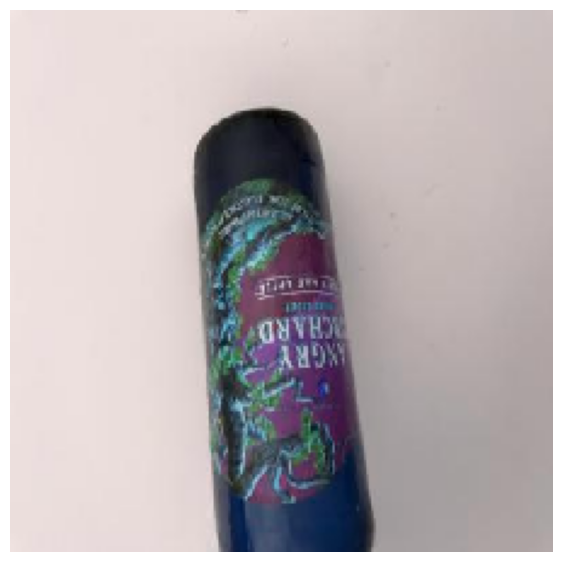

In [4]:

dict = {
    'paper': 0,
    'plastic': 1,
    'cardboard': 2,
    'compost': 3,
    'trash': 4,
    'metal': 5,
    'glass': 6
}

train_data = []
train_labels = []
for i in os.listdir(train_path):
  dir = train_path + '/' + i
  for j in os.listdir(dir):
    img_path = dir + '/' + j
    img = cv2.imread(img_path,-1)
    img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
    train_data.append(img)
    train_labels.append(dict[i])

plt.figure(figsize=(7,10))
plt.axis('off')
plt.imshow(img)
train_data = np.array(train_data)
train_labels = np.array(train_labels)
print(train_data.shape, train_labels.shape)

In [5]:

classes = os.listdir(train_path)
classes


['metal', 'cardboard', 'paper', 'trash', 'compost', 'plastic', 'glass']

In [8]:
test_path = '/content/drive/MyDrive/Colab Notebooks/test'

In [9]:

test_data = []
test_labels = []
classes = 7
for i in os.listdir(test_path):
    dir = test_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
        test_data.append(img)
        test_labels.append(dict[i])


test_data = np.array(test_data)
test_labels = np.array(test_labels)
print(test_data.shape, test_labels.shape)


(564, 224, 224, 3) (564,)


In [10]:

training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_path,
                                      target_size=(224, 224),
                                      batch_size=32,
                                      class_mode='categorical')


Found 2206 images belonging to 7 classes.


In [11]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

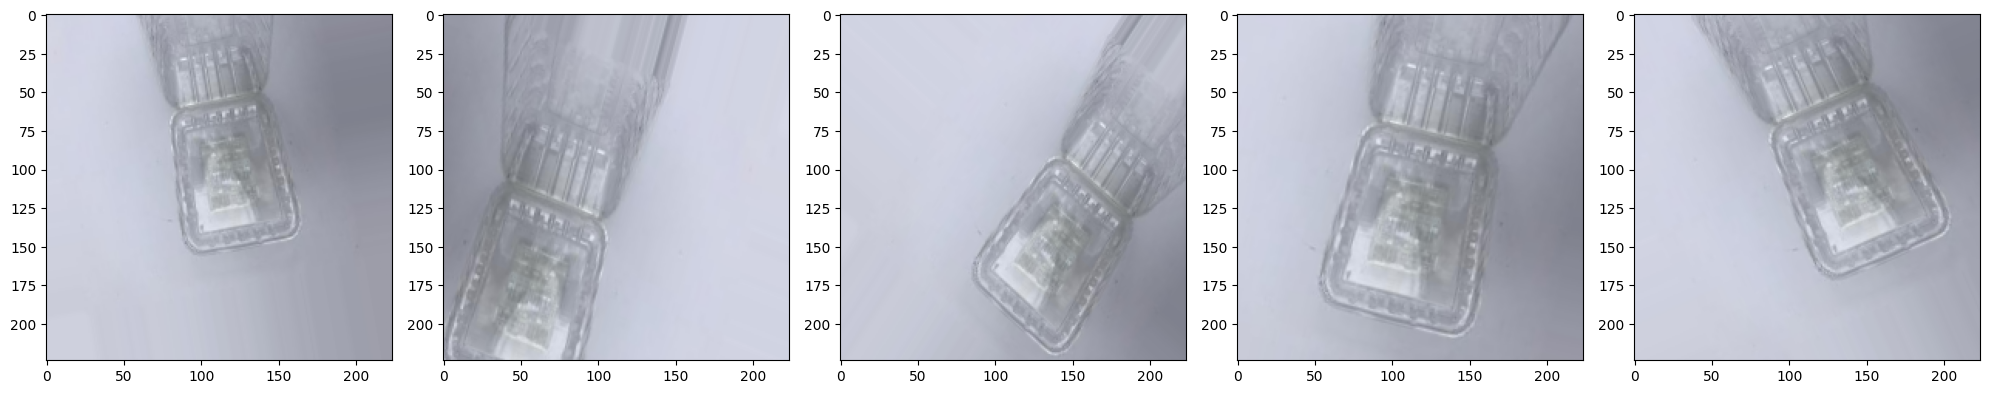

In [12]:

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Traingn images')

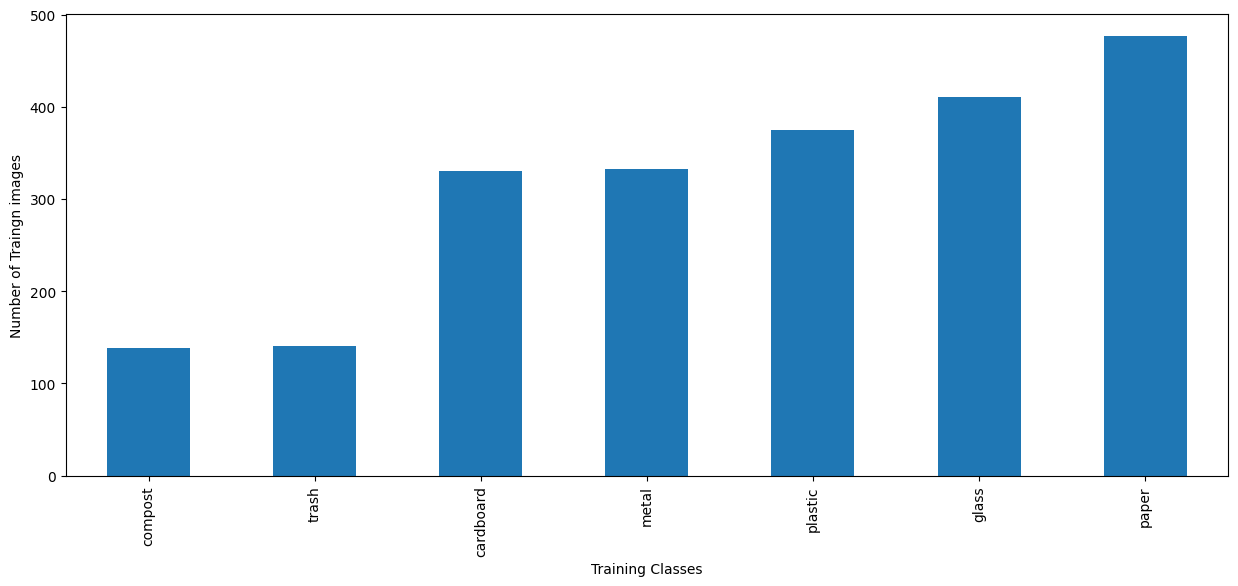

In [13]:

data_dic = {}
for folder in os.listdir(train_path):
    data_dic[folder] = len(os.listdir(train_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')


In [14]:

testing_datagen = ImageDataGenerator(rescale=1./255)

testing_data = testing_datagen.flow_from_directory(test_path,
                                      target_size=(224, 224),
                                      batch_size=32,
                                      class_mode='categorical')


Found 564 images belonging to 7 classes.


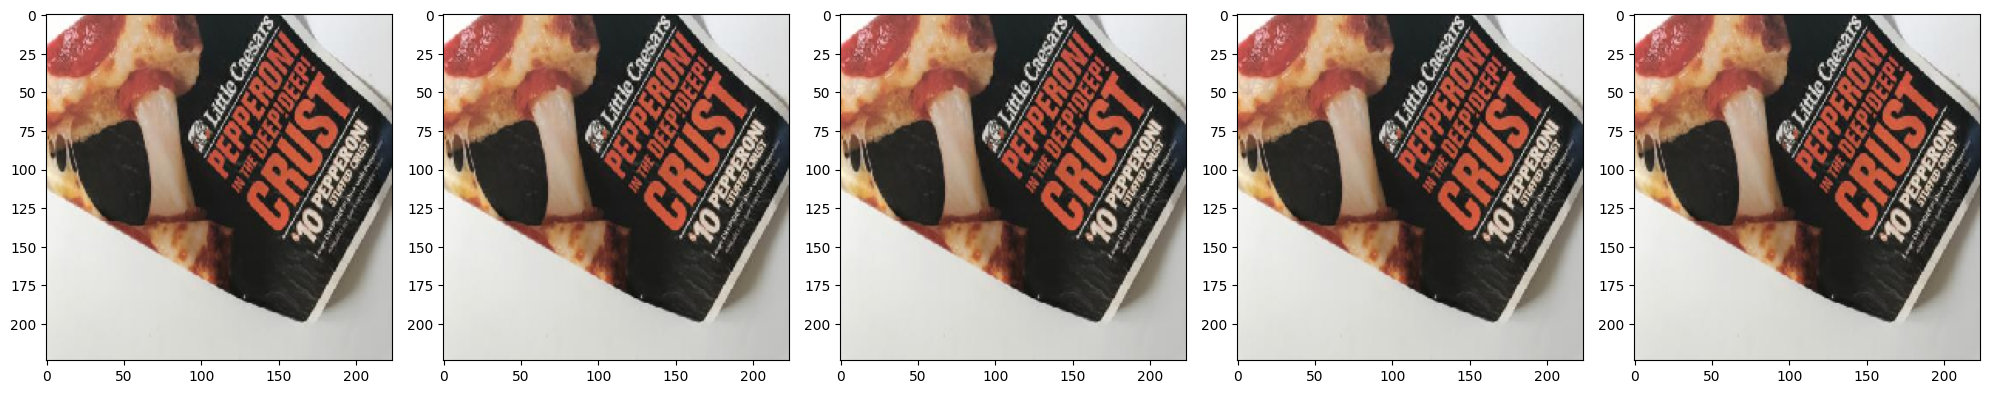

In [15]:

images = [testing_data[1][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Valedation images')

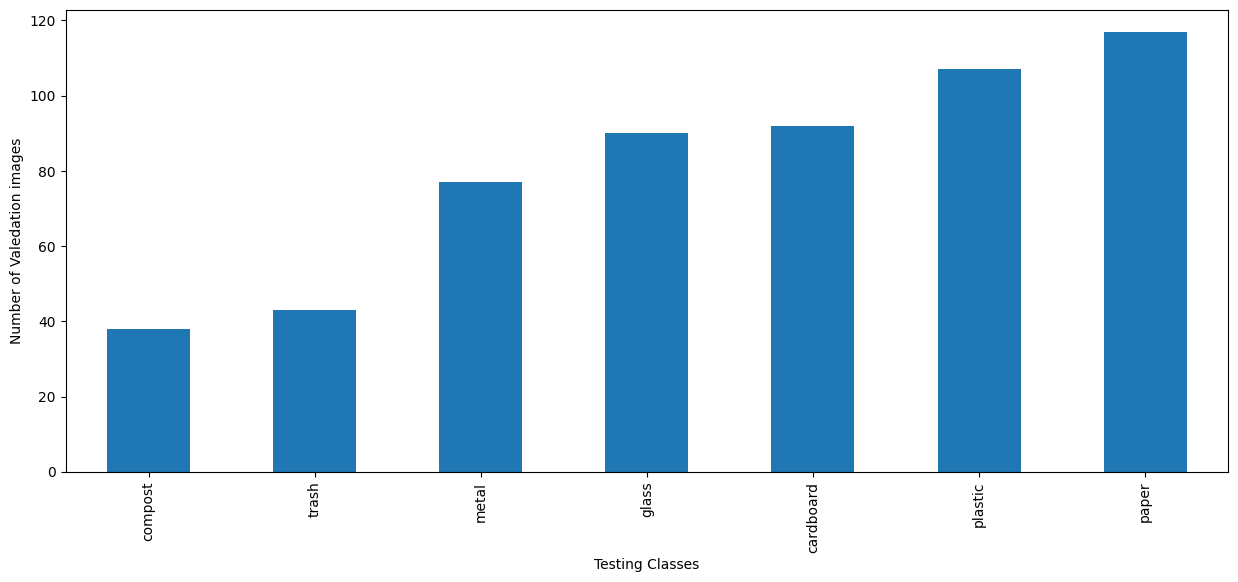

In [16]:

data_dic = {}
for folder in os.listdir(test_path):
    data_dic[folder] = len(os.listdir(test_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Testing Classes')
plt.ylabel('Number of Valedation images')

In [17]:

IMAGE_SIZE = [224, 224]

In [18]:
train_labels.shape

(2195,)

In [19]:
from tensorflow.keras.utils import to_categorical
X_train = train_data
y_train = train_labels
X_test = test_data
y_test = test_labels

Y_train = to_categorical(y_train)

Y_test = to_categorical(y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(2195, 224, 224, 3)
(2195, 7)
(564, 224, 224, 3)
(564, 7)


In [20]:
from tensorflow.keras.utils import to_categorical


Found 564 images belonging to 7 classes.


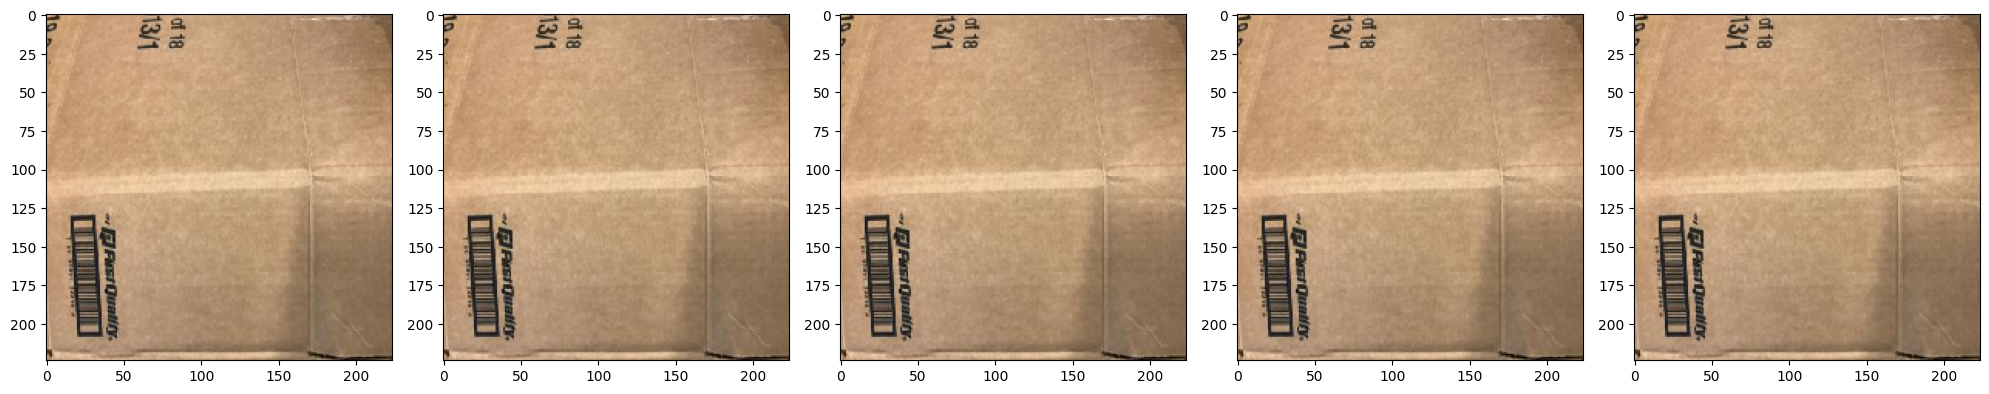

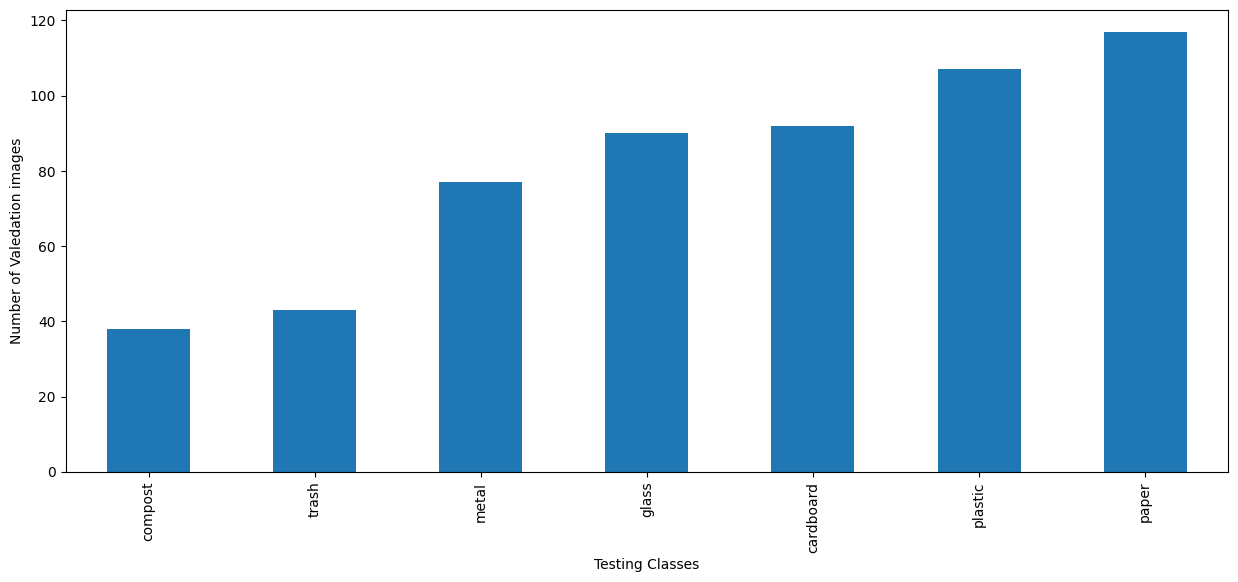

In [22]:
!pip install tensorflow
!pip install keras

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
testing_datagen = ImageDataGenerator(rescale=1./255)

testing_data = testing_datagen.flow_from_directory(test_path,
                                      target_size=(224, 224),
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# showing augmented images
images = [testing_data[1][0][0] for i in range(5)]
plotImages(images)

# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(test_path):
    data_dic[folder] = len(os.listdir(test_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Testing Classes')
plt.ylabel('Number of Valedation images')

IMAGE_SIZE = [224, 224]

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

from tensorflow.keras.utils import to_categorical

In [23]:
train_labels.shape

(2195,)

In [24]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(2195, 224, 224, 3)
(2195, 7)
(564, 224, 224, 3)
(564, 7)


In [25]:
base_model = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)
base_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
for layer in base_model.layers:
  layer.trainable = False
  print('Layer ' + layer.name + ' frozen.')

last = base_model.layers[-1].output
x = Flatten()(last)
prediction = Dense(len(os.listdir(train_path)), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction)


Layer input_layer frozen.
Layer block1_conv1 frozen.
Layer block1_conv2 frozen.
Layer block1_pool frozen.
Layer block2_conv1 frozen.
Layer block2_conv2 frozen.
Layer block2_pool frozen.
Layer block3_conv1 frozen.
Layer block3_conv2 frozen.
Layer block3_conv3 frozen.
Layer block3_pool frozen.
Layer block4_conv1 frozen.
Layer block4_conv2 frozen.
Layer block4_conv3 frozen.
Layer block4_pool frozen.
Layer block5_conv1 frozen.
Layer block5_conv2 frozen.
Layer block5_conv3 frozen.
Layer block5_pool frozen.


In [27]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │         175,623 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,890,311 (56.80 MB)

 Trainable params: 175,623 (686.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [60]:


early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4,
                           restore_best_weights = True,
                           mode = 'min')



In [34]:
probs = model.predict(testing_data,steps = len(testing_data), verbose = 1)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 772ms/step


In [35]:
preds = np.argmax(probs,axis = 1)

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix


# Calculate the classification report and confusion matrix
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


              precision    recall  f1-score   support

           0       0.21      0.03      0.05       117
           1       0.33      0.02      0.04       107
           2       0.06      0.01      0.02        92
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        43
           5       0.14      0.94      0.24        77
           6       0.00      0.00      0.00        90

    accuracy                           0.14       564
   macro avg       0.11      0.14      0.05       564
weighted avg       0.14      0.14      0.05       564

[[  3   0   1   0   0 113   0]
 [  2   2   5   0   1  97   0]
 [  4   2   1   0   0  85   0]
 [  0   1   0   0   0  37   0]
 [  2   1   4   0   0  36   0]
 [  2   0   3   0   0  72   0]
 [  1   0   2   0   1  86   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
def load_test_data():
  X_test, y_test = np.loadtxt("test_data.csv", delimiter=",", unpack=True)
  return X_test, y_test

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,preds)


cm

array([[  3,   0,   1,   0,   0, 113,   0],
       [  2,   2,   5,   0,   1,  97,   0],
       [  4,   2,   1,   0,   0,  85,   0],
       [  0,   1,   0,   0,   0,  37,   0],
       [  2,   1,   4,   0,   0,  36,   0],
       [  2,   0,   3,   0,   0,  72,   0],
       [  1,   0,   2,   0,   1,  86,   0]])

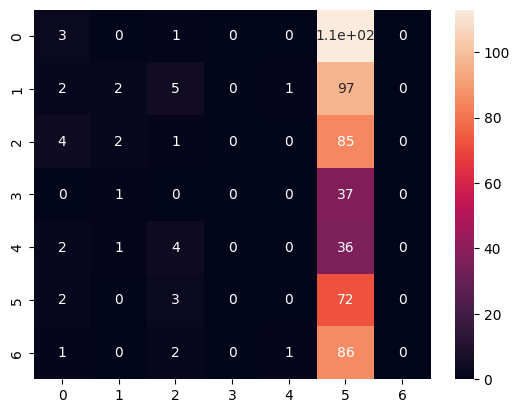

In [39]:

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')


In [40]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,preds)
score

0.13829787234042554

In [41]:
# We evaluate the accuracy and the loss in the test set
scores = model.evaluate(testing_data, steps = len(testing_data), verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.1796 - loss: 2.2182
Test loss: 2.2374844551086426
Test accuracy: 0.1843971610069275


In [46]:
y_pred = model.predict(testing_data)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step


In [47]:

y_pred

array([[0.2176954 , 0.0857406 , 0.15088306, ..., 0.1322036 , 0.34461007,
        0.05482225],
       [0.12371718, 0.20911257, 0.10774574, ..., 0.15281965, 0.33712608,
        0.05027826],
       [0.17330806, 0.14430846, 0.21263991, ..., 0.13596058, 0.21354726,
        0.0984839 ],
       ...,
       [0.17867894, 0.09225895, 0.16423026, ..., 0.10369472, 0.37600926,
        0.07212725],
       [0.1492342 , 0.10568904, 0.15798171, ..., 0.12200108, 0.37694684,
        0.07437737],
       [0.0711747 , 0.09629225, 0.1766034 , ..., 0.11449505, 0.41365683,
        0.11465398]], dtype=float32)

In [ ]:
prediction = np.argmax(y_pred,axis =1)

In [ ]:
prediction

In [48]:
rev_dict = {
    0 : 'paper',
    1 :'plastic',
    2 : 'cardboard',
    3 : 'compost',
    4 : 'trash',
    5 :'metal',
    6 : 'glass'
}

In [49]:
rev_dict.values()

dict_values(['paper', 'plastic', 'cardboard', 'compost', 'trash', 'metal', 'glass'])

In [59]:
probs = model_Res.predict(testing_data,steps = len(testing_data), verbose = 1)
preds = np.argmax(probs,axis = 1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step


In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.21      0.03      0.05       117
           1       0.33      0.02      0.04       107
           2       0.06      0.01      0.02        92
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        43
           5       0.14      0.94      0.24        77
           6       0.00      0.00      0.00        90

    accuracy                           0.14       564
   macro avg       0.11      0.14      0.05       564
weighted avg       0.14      0.14      0.05       564

[[  3   0   1   0   0 113   0]
 [  2   2   5   0   1  97   0]
 [  4   2   1   0   0  85   0]
 [  0   1   0   0   0  37   0]
 [  2   1   4   0   0  36   0]
 [  2   0   3   0   0  72   0]
 [  1   0   2   0   1  86   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
t_img=cv2.imread('/content/compost150.jpg')

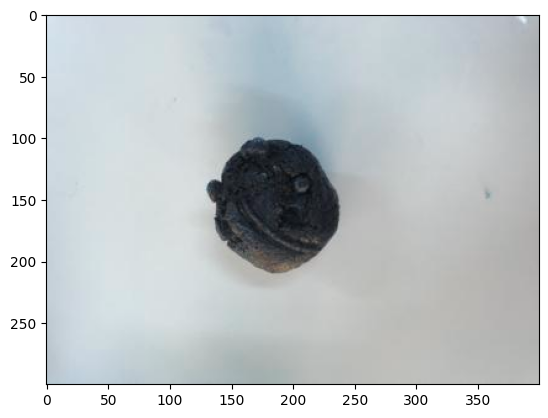

In [55]:
import cv2
plt.imshow(t_img)
test_img = cv2.resize(t_img,(256,256))

In [56]:
import cv2
import numpy as np

# Assuming t_img is a valid image array

# Resize the image
t_img_resized = cv2.resize(t_img, (224, 224))

# Reshape the image array
t_input = t_img_resized.reshape((1, 224, 224, 3))

# Predict using the model
a_pred = model.predict(t_input)

# Get the index of the highest probability prediction
p = np.argmax(a_pred, axis=1)

# Map the index to the corresponding class label using rev_dict
a_hat_pred = [rev_dict[i] for i in p]

# Return the predicted class labels



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [57]:
a_hat_pred

['paper']